# Scale Invariant Feature Transform

SIFT, or Scale Invariant Feature Transform, is a feature detection algorithm in Computer Vision.
SIFT helps locate the local features in an image, commonly known as the ‘keypoints‘ of the image. These keypoints are scale & rotation invariant that can be used for various computer vision applications, like image matching, object detection, scene detection, etc.

We can also use the keypoints generated using SIFT as features for the image during model training. The major advantage of SIFT features, over edge features or hog features, is that they are not affected by the size or orientation of the image.

# Installing the Library

In [1]:
!pip uninstall opencv-python -y
!pip install opencv-contrib-python==3.4.2.17 --force-reinstall

Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 139kB/s 
     |████████████████████████████████| 14.6MB 311kB/s 
ERROR: imgaug 0.2.9 requires opencv-python, which is not installed.
ERROR: dopamine-rl 1.0.5 requires opencv-python>=3.4.1.15, which is not installed.
ERROR: albumentations 0.1.12 requires opencv-python, which is not installed.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


# Keypoints in an Image

Once the images have been created, the next step is to find the important keypoints from the image that can be used for feature matching. The idea is to find the local maxima and minima for the images. This part is divided into two steps:

1. Find the local maxima and minima
2. Remove low contrast keypoints (keypoint selection)

# Local Maxima and Local Minima
To locate the local maxima and minima, we go through every pixel in the image and compare it with its neighboring pixels.

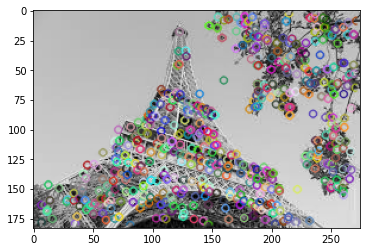

In [4]:
import cv2 
import matplotlib.pyplot as plt


#reading image
img1 = cv2.imread('1.jpg') 
img2 = cv2.imread('2.jpg')  
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#keypoints
sift = cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1)
plt.imshow(img_1)

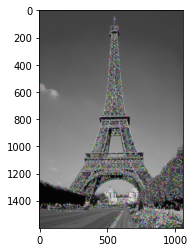

In [6]:
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

img_2 = cv2.drawKeypoints(gray2,keypoints_2,img2)
plt.imshow(img_2)

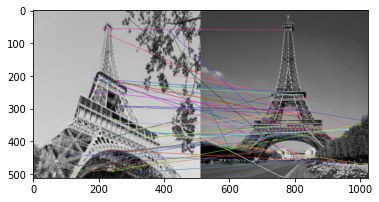

(<matplotlib.image.AxesImage at 0x7f6f38189cf8>, None)

In [8]:
# read images
img1 = cv2.imread('1.jpg')  
img2 = cv2.imread('2.jpg') 

img1 = cv2.resize(img1,(512,512))
img2 = cv2.resize(img2,(512,512))

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#sift
sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.imshow(img3),plt.show()